# Importing Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import squarify

**Loading the dataset**

In [110]:
df = pd.read_csv('C:\\Users\\Madhumitha\\Desktop\\Sarah Job\\Github Projects\\Cybersecurity Suspicious Web Threat Interactions\\CloudWatch_Traffic_Web_Attack.csv')

# Data Exploration

**Checking rows and columns**

In [111]:
df.shape

(282, 16)

**Checking data types**

In [112]:
df.dtypes

bytes_in                int64
bytes_out               int64
creation_time          object
end_time               object
src_ip                 object
src_ip_country_code    object
protocol               object
response.code           int64
dst_port                int64
dst_ip                 object
rule_names             object
observation_name       object
source.meta            object
source.name            object
time                   object
detection_types        object
dtype: object

**Displaying first 5 rows**

In [113]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


**Checking Data Information**

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

**Summary of numerical columns**

In [115]:
df.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


**Checking for missing values**

In [116]:
df.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

# Exploratory Data Analysis (EDA)

**Distribution of Bytes In and Bytes Out**

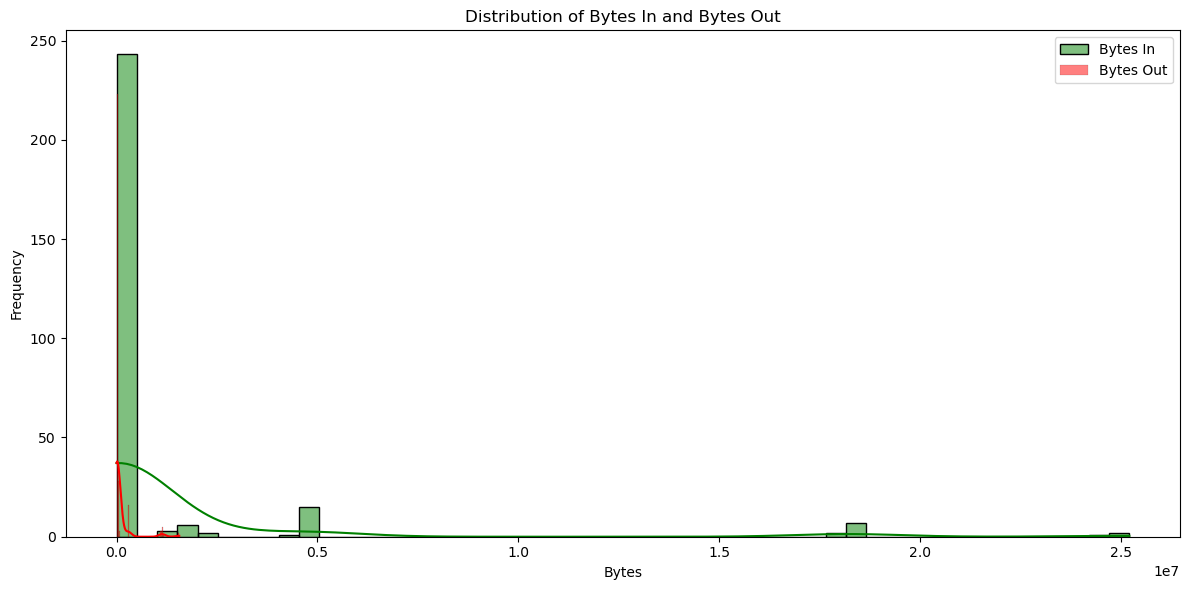

In [117]:
plt.figure(figsize=(12, 6))
sns.histplot(df['bytes_in'], bins=50, color='green', kde=True, label='Bytes In')
sns.histplot(df['bytes_out'], bins=50, color='red', kde=True, label='Bytes Out')
plt.title('Distribution of Bytes In and Bytes Out')
plt.xlabel('Bytes')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

**Detection Types by Country**

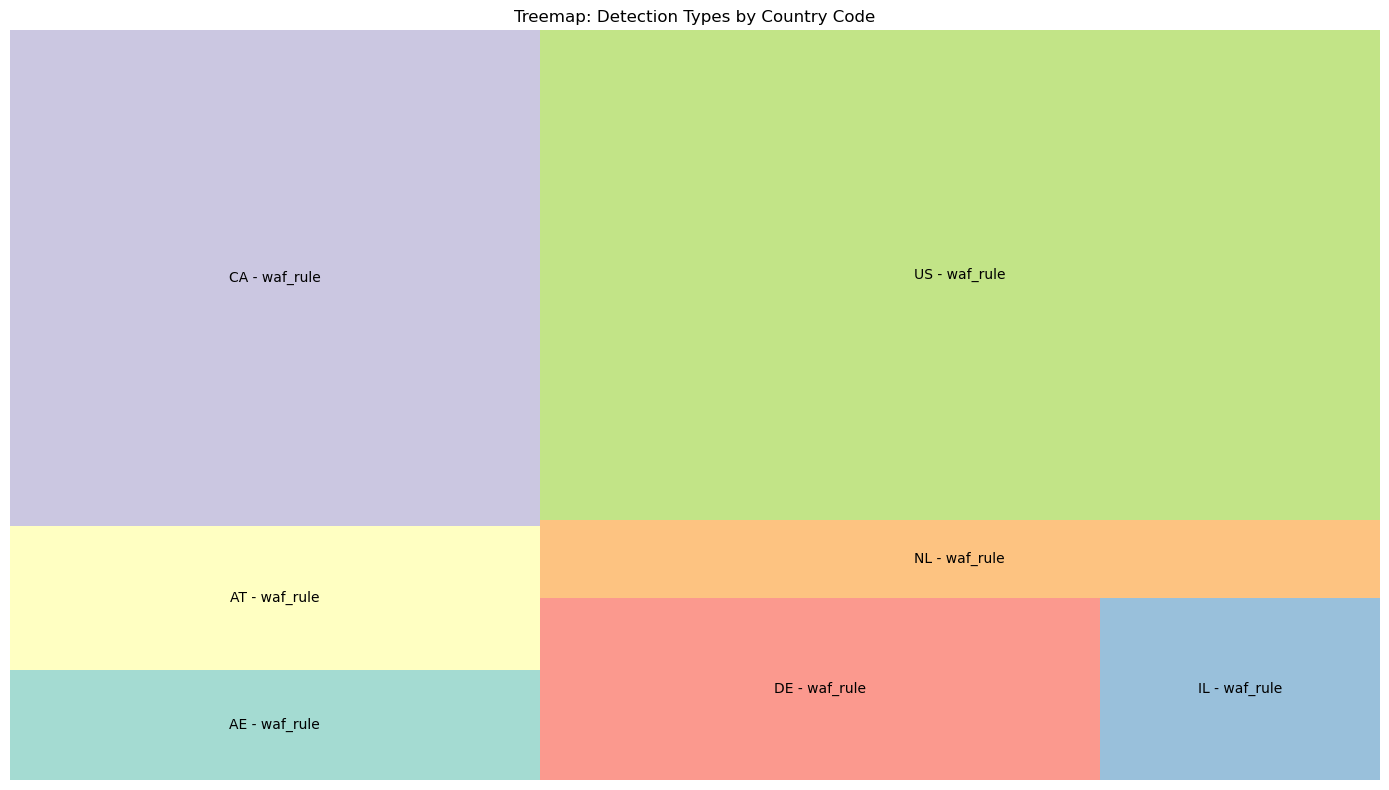

In [118]:
ct = pd.crosstab(df['src_ip_country_code'], df['detection_types'])
ct = ct.stack().reset_index()
ct.columns = ['Country', 'Detection', 'Count']
ct['Label'] = ct['Country'] + " - " + ct['Detection']

plt.figure(figsize=(14, 8))
squarify.plot(sizes=ct['Count'], label=ct['Label'], alpha=0.8, color=sns.color_palette("Set3", len(ct)))
plt.title("Treemap: Detection Types by Country Code")
plt.axis('off')
plt.tight_layout()
plt.show()

**Country-wise Interaction Count**

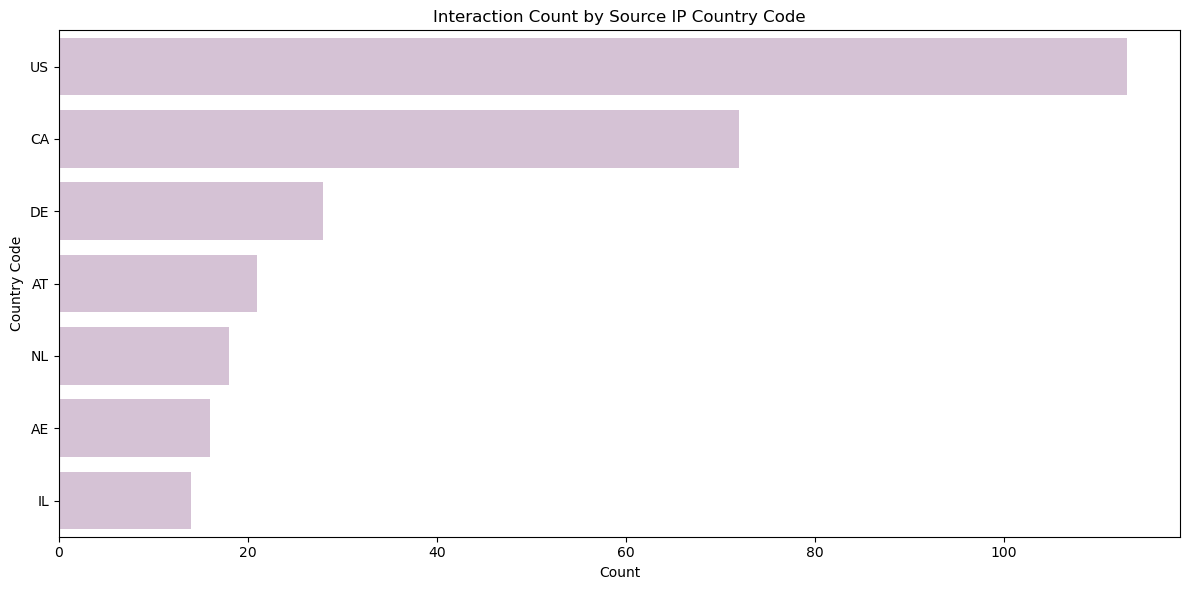

In [119]:
plt.figure(figsize=(12, 6))
sns.countplot(y='src_ip_country_code', data=df, order=df['src_ip_country_code'].value_counts().index,color='#D8BFD8')
plt.title('Interaction Count by Source IP Country Code')
plt.xlabel('Count')
plt.ylabel('Country Code')
plt.tight_layout()
plt.show()

**Time Series Plot: Traffic Over Time**

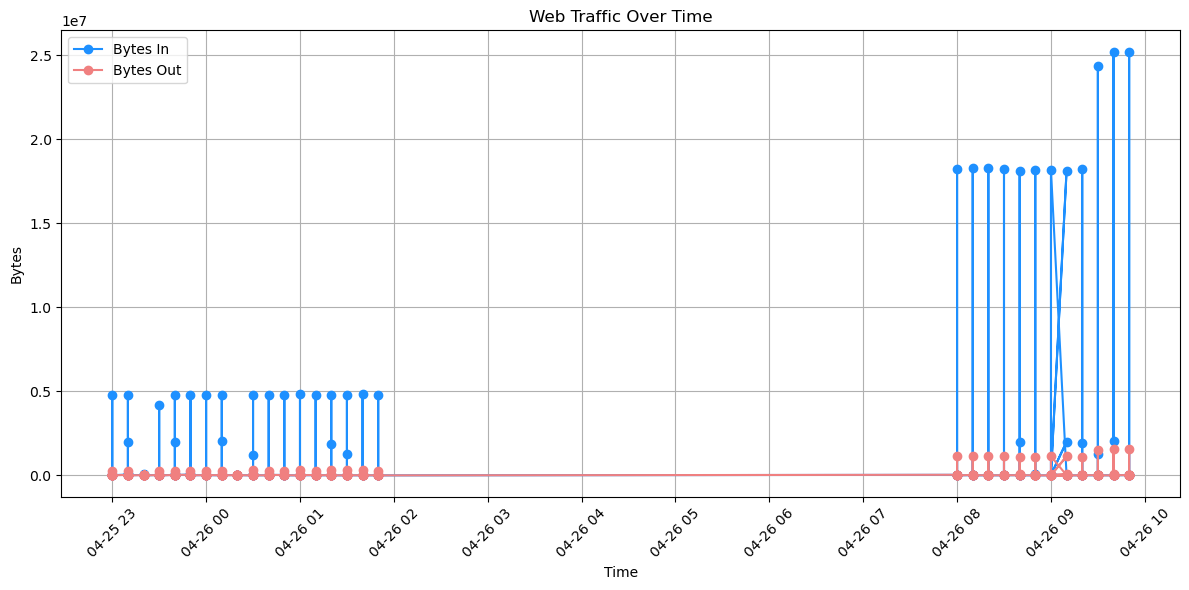

In [120]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df.set_index('creation_time', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bytes_in'], label='Bytes In', marker='o',color='dodgerblue')
plt.plot(df.index, df['bytes_out'], label='Bytes Out', marker='o',color='lightcoral')
plt.title('Web Traffic Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df.reset_index(inplace=True)

**Correlation Heatmap (on numerical columns only)**

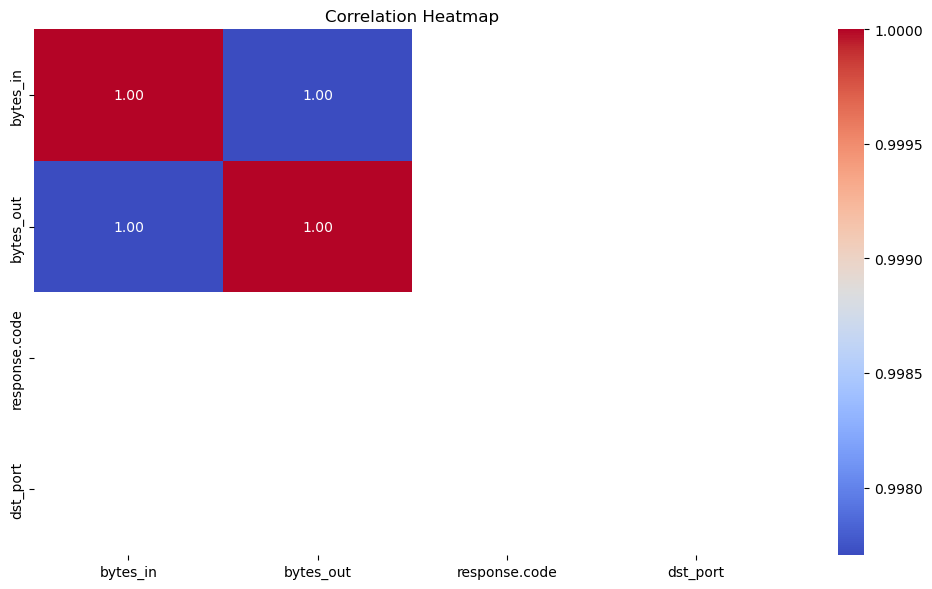

In [121]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**Bytes In vs Bytes Out Scatter Plot**

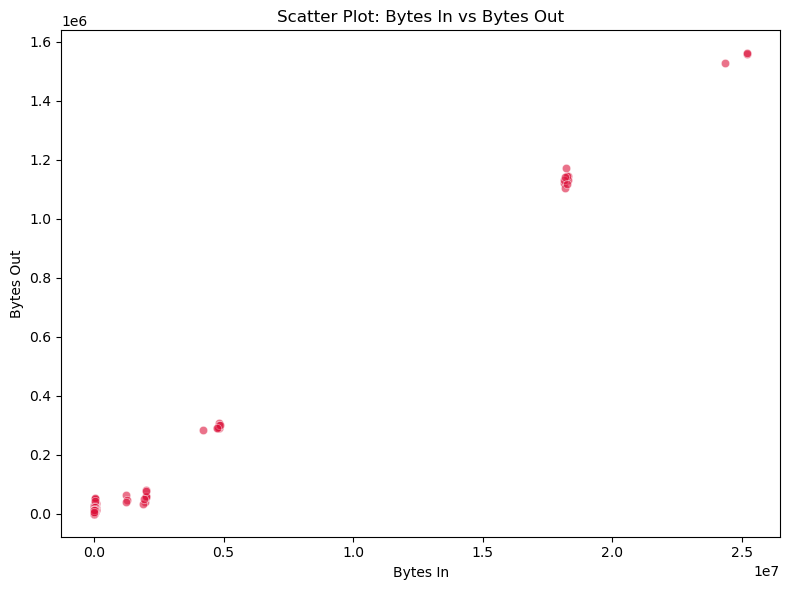

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', data=df, alpha=0.6, color='crimson')
plt.title("Scatter Plot: Bytes In vs Bytes Out")
plt.xlabel("Bytes In")
plt.ylabel("Bytes Out")
plt.tight_layout()
plt.show()

# Data Cleaning

In [123]:
df.drop_duplicates(inplace=True)
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['time'] = pd.to_datetime(df['time'])
df['src_ip_country_code'] = df['src_ip_country_code'].str.upper()

# Feature Engineering

In [124]:
df['duration_seconds'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

**Feature Scaling**

In [125]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False)

In [126]:
scaled = scaler.fit_transform(df[['bytes_in', 'bytes_out', 'duration_seconds']])
encoded = encoder.fit_transform(df[['src_ip_country_code']])

In [127]:
scaled_df = pd.DataFrame(scaled, columns=['scaled_bytes_in', 'scaled_bytes_out', 'scaled_duration_seconds'])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['src_ip_country_code']))

In [128]:
df_transformed = pd.concat([df.reset_index(drop=True), scaled_df, encoded_df], axis=1)

In [129]:
# Step 1: Create the label in df
df['is_suspicious'] = (df['detection_types'] == 'waf_rule').astype(int)
# Step 2: Add the label to df_transformed
df_transformed['is_suspicious'] = df['is_suspicious'].values

**Define features and target variable**

In [130]:
X = df_transformed[['bytes_in', 'bytes_out', 'scaled_duration_seconds']]
y = df_transformed['is_suspicious'] 

**Train-Test Split**

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Train the Model**

In [132]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [133]:
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



# MLP Classifier

In [134]:
mlp = MLPClassifier(hidden_layer_sizes=(8, 16),activation='relu',solver='adam',max_iter=300,random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



# Confusion Matrix

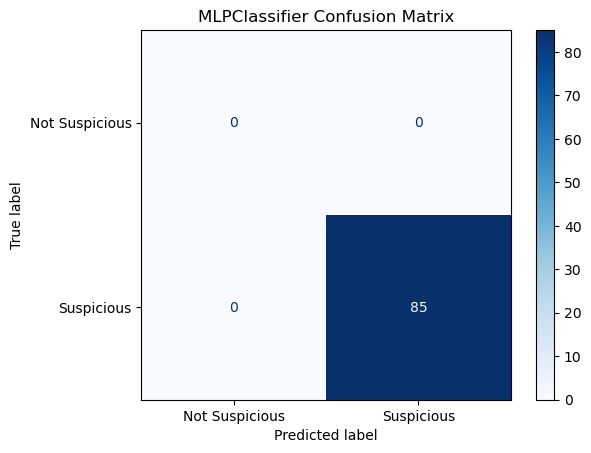

In [135]:
cm = confusion_matrix(y_test, y_pred_mlp, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Suspicious', 'Suspicious'])
disp.plot(cmap='Blues')
plt.title("MLPClassifier Confusion Matrix")
plt.show()

**Anomaly Detection using Isolation Forest**

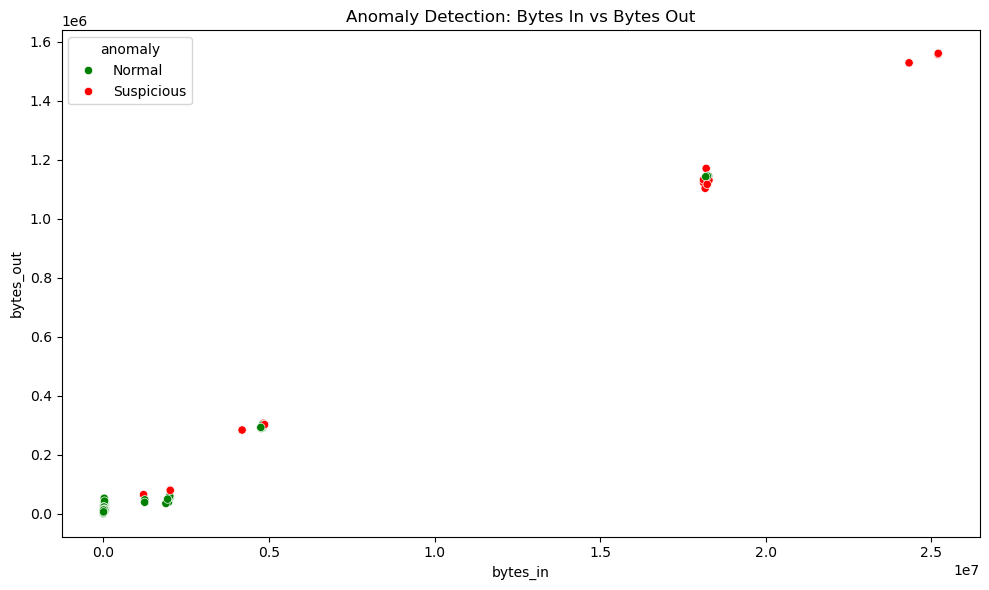

In [136]:
iso_model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_model.fit_predict(df[['bytes_in', 'bytes_out', 'duration_seconds']])
df['anomaly'] = df['anomaly'].apply(lambda x: 'Suspicious' if x == -1 else 'Normal')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', hue='anomaly', data=df, palette={'Normal': 'green', 'Suspicious': 'red'})
plt.title("Anomaly Detection: Bytes In vs Bytes Out")
plt.tight_layout()
plt.show()

# Network Graph Visualization


Generating network graph...
Graph nodes: 29
Graph edges: 28


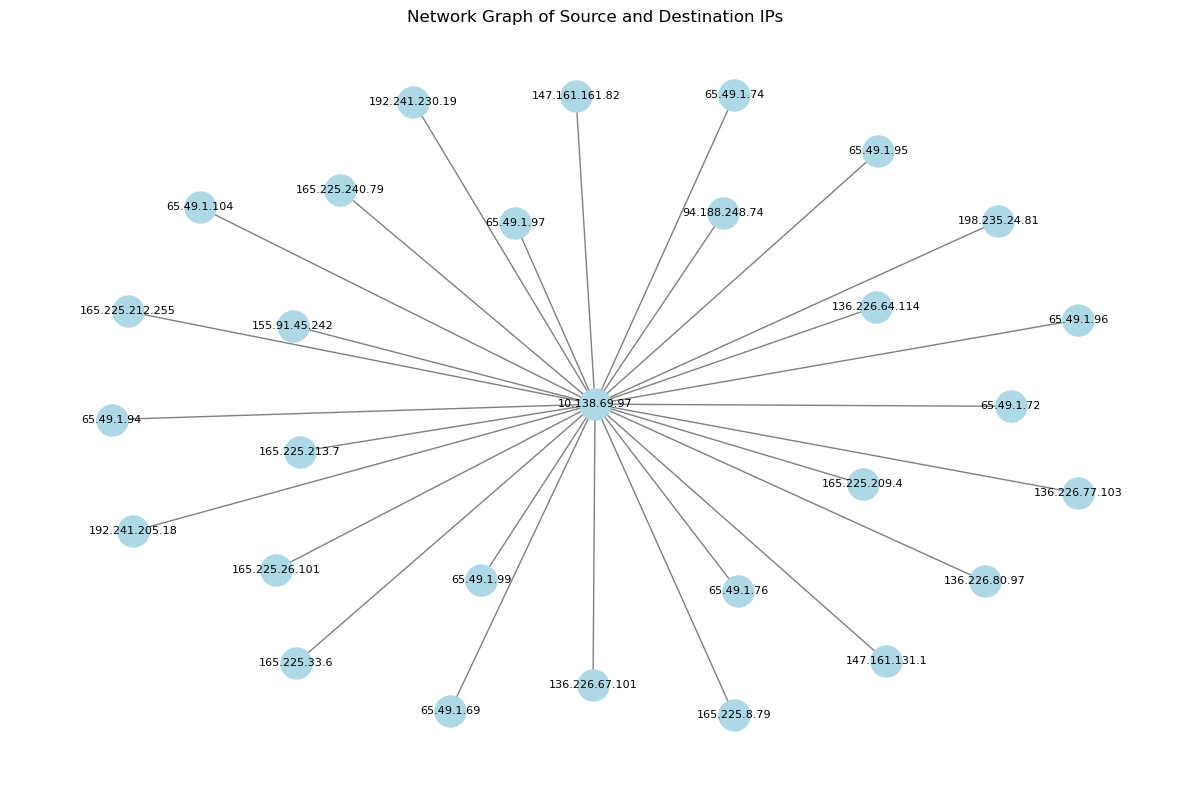

In [137]:
print("\nGenerating network graph...")
df_ip = df.dropna(subset=['src_ip', 'dst_ip']).drop_duplicates(subset=['src_ip', 'dst_ip']).head(50)

G = nx.Graph()
for idx, row in df_ip.iterrows():
    G.add_edge(row['src_ip'], row['dst_ip'])

# Check that the graph has edges
print("Graph nodes:", G.number_of_nodes())
print("Graph edges:", G.number_of_edges())

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', font_size=8)
plt.title('Network Graph of Source and Destination IPs')
plt.axis('off')
plt.tight_layout()
plt.show()